
# Diseño de software para cómputo científico

----

## Unidad 5: Integración con lenguajes de alto nivel con bajo nivel.


## Agenda de la Unidad 5

- JIT (Numba)
- Cython.
- **Integración de Python con FORTRAN.**
- Integración de Python con C. 



## Recapitulando

- Escribimos el código Python.
- Pasamos todo a numpy.
- Hicimos profile.
- Paralelisamos (joblib/dask).
- Hicimos profile.
- Usamos Numba.
- Hicimos profile.
- Si podemos elegir el lenguaje: Cython
    - Si no podemos elegir el lenguaje y vamos a hacer cómputo numérico FORTRAN.


## Fortran

- Previamente FORTRAN, contracción del inglés The IBM Mathematical Formula Translating System.
- Es un lenguaje de programación de alto nivel de propósito general, procedimental e imperativo, que está especialmente adaptado al cálculo numérico y a la computación científica.
- Desarrollado originalmente por IBM en 1957 por John Backus.
- Es una familia de lenguajes los cuales incluyen entre otros: FORTRAN - FORTRAN II - FORTRAN 77 - Fortran 95 - Fortran 2018.


<img src="imgs/fortrancard.png" style="width=50px">

La tesis de Apu esta hecha probablemente en FORTRAN o algún tipo de Assembler.
![imgs/apuphd.img](imgs/apuphd.gif)

## Características

- **Alta performance:** Diseñado desde el comienzo para aplicaciones matemáticas e ingenieriles computacionalmente intensivas
- **Tipeado estático:** Es de tipeado estático, lo que permite que el compilador encuentre incongruencias al momento de 
compilar (me salvó más de una vez)
- **Fácil de aprender y usar:** Un poco debatible actualmente, pero las versiones de Fortran a partir de Fortran 90 son bastante amigables.
A veces es más fácil quejarse de la herramienta que del herrero
- **Versátil:** Actualmente Fortran puede escribirse en múltiples estilos:
    - Imperativo
    - Procedural
    - Orientado a arrays
    - Orientado a objetos (a partir de Fortran 2003)
    - Funcional
- **Nativamente paralelo:** Es fácil para realizar cómputo paralelo.

## Código FORTRAN 77

- Formato estático:
    - Primeras 6 columnas tienen su significado
    - A partir de la 7ma a 72 se escribe el código en sí
```f77
      SUBROUTINE FIB(A,N)
C
C     CALCULATE FIRST N FIBONACCI NUMBERS
C
      INTEGER N
      REAL*8 A(N)
      DO I=1,N
         IF (I.EQ.1) THEN
            A(I) = 0.0D0
         ELSEIF (I.EQ.2) THEN
            A(I) = 1.0D0
         ELSE
            A(I) = A(I-1) + A(I-2)
         ENDIF
      ENDDO
      END
```

## Estructura general código Fortran 90
- Es de formato libre, aunque también es compatible con F77

```for
subroutine fib(a, n)
    ! Calculate the first `n` Fibonacci numbers.
    integer :: n
    integer :: a(n)

    do i = 1, n
        if (i == 1) then
            a(i) = 0
        elseif (i == 2) then
            a(i) = 1
        else
            a(i) = a(i-1) + a(i-2)
        end if
    end do
end subroutine
```

In [37]:
#!pip install fortran-magic
%load_ext fortranmagic

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


## Hola mundo en Fortran 95

In [38]:
%%fortran

subroutine hola_mundo(n)
    integer :: n
    character(len=12) :: msg
    msg = 'Hola, mundo!'
    
    do i = 1, n
        print *, msg
    end do
end subroutine

In [39]:
hola_mundo(5)

## Cómo se compara Fortran con Python?

In [5]:
%%fortran
subroutine for_fib(a, n)
    ! Calculate the first `n` Fibonacci numbers.
    integer :: n
    integer :: a(n)

    do i = 1, n
        if (i == 1) then
            a(i) = 0
        elseif (i == 2) then
            a(i) = 1
        else
            a(i) = a(i-1) + a(i-2)
        end if
    end do
end subroutine for_fib

In [7]:
import numba

def py_fib(a):
    n = len(a)
    for i in range(n):
        if i == 0:
            a[i] = 0
        elif i == 1:
            a[i] = 1
        else:
            a[i] = a[i-1] + a[i-2]
         
@numba.jit
def nb_fib(a):
    n = len(a)
    for i in range(n):
        if i == 0:
            a[i] = 0
        elif i == 1:
            a[i] = 1
        else:
            a[i] = a[i-1] + a[i-2]

In [9]:
import numpy as np

a = np.ones(100_000, 'i')
%timeit for_fib(a)

a = [1 for i in range(100_000)]
%timeit py_fib(a)

a = np.ones(100_000, 'i')
%timeit nb_fib(a)

34.3 µs ± 271 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
96.5 ms ± 8.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
95.7 µs ± 677 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


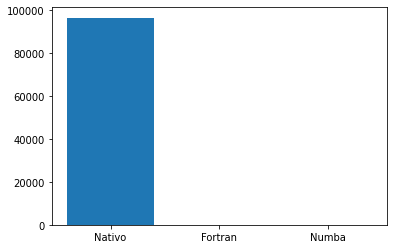

In [40]:
import matplotlib.pyplot as plt
x = ['Nativo', 'Fortran','Numba']
y = [96500, 34.3, 95.7]
plt.bar(x,y)
plt.show()

### Comparación en el cálculo de un set Julia

https://pnavaro.github.io/python-fortran/03.julia-set.html

<table>
<td>
<img src="imgs/juliatable.png">
</td>
<td>
<img src="imgs/juliaset.png" style="width: 300px;">
</td>
</table>

# Integración de Fotran con Python
(bueno, y cómo hacemos para que esto ande dentro de un programa de verdad?)

### F2PY

- F2PY es una herramienta que permite la comunicación entre Python y Fortran. F2PY genera módulos de extensión (extension modules) para Python a partir de código Fortran, lo que permite:
- Utilizar subrutinas, datos en bloques COMMON y variables en módulos de FORTRAN 77 o Fortran 90/95 desde    Python.
- Llamar funciones de Python desde Fortran (callbacks).
- Manejar automáticamente la diferencia entre arrays NumPy-contiguos (esto es, C-contiguos) y Fortran-contiguos.
- Fue creado en 1999 por Pearu Peterson mientras era estudiante de doctorado en la Universidad Técnica de Tallin, y en 2005 después de varias versiones estables quedó incluido dentro de NumPy.

## Instalación

- Si tienen numpy tienen F2PY.
- Necesitamos tener instalado `gfortran`.
- Ademas vale la pena instalar para usar el *cell-magic* 

```bash
$ pip install fortran-magic
```

## Problemas de F2PY

- F2PY funciona con FORTRAN 77 o Fortran 90/95 que no incluya características «modernas» como punteros, tipos derivados o arrays en forma asumida; prueba de ello es  SciPy. 
- El soporte de Fortran 90/95 es incompleto, a veces hay que editar las cabeceras manualmente (ya hablaremos de ellas)
- Para código antiguo, especialmente para el muy antiguo, no hay problemas; para código nuevo y moderno hará falta un poco más de maña, pero el resultado merece la pena.

# Compilado manual utilizando `f2py`

Se considera que existen 3 formas de compilar código fortran a Python mediante f2py:

- La rápida
- La inteligente
- La rápida e inteligente

## La rápida

- Asumiendo que tenemos el mismo código fibonacci en un archivo llamado `fib.f90`
- Podemos compilarlo manualmente haciendo:

```bash
$ f2py -c fib.f90 -m fib
```
- Esto crea un `vectores<ARCH>.so` o `.pyd`(Windows)

In [27]:
#!cd fortran; f2py -c fib.for -m fib
!bat fortran/fib.for

───────┬────────────────────────────────────────────────────────────────────────
       │ File: fortran/fib.for
───────┼────────────────────────────────────────────────────────────────────────
   1   │       SUBROUTINE FIB(A,N)
   2   │ C
   3   │ C     CALCULATE FIRST N FIBONACCI NUMBERS
   4   │ C
   5   │       INTEGER N
   6   │       REAL*8 A(N)
   7   │       DO I=1,N
   8   │          IF (I.EQ.1) THEN
   9   │             A(I) = 0.0D0
  10   │          ELSEIF (I.EQ.2) THEN
  11   │             A(I) = 1.0D0
  12   │          ELSE
  13   │             A(I) = A(I-1) + A(I-2)
  14   │          ENDIF
  15   │       ENDDO
  16   │       END
───────┴────────────────────────────────────────────────────────────────────────


In [28]:
from fortran.fib import fib
print(fib.__doc__)

fib(a,[n])

Wrapper for ``fib``.

Parameters
----------
a : input rank-1 array('d') with bounds (n)

Other Parameters
----------------
n : input int, optional
    Default: len(a)



## La forma inteligente: Ficheros `*.pyf`

- Para generar módulos Python F2PY auto-genera (y luego elimina)archivos de cabecera de extensión `.pyf`
- Las cabecera que  definen la interfaz a los subprogramas Fortran que se llamarán desde Python.
- Por ejemplo, vamos a generar el fichero de cabecera de nuestro módulo de operaciones vectoriales:

```bash
$ f2py -h fib.pyf -m fib fib.for
```

> Con el argumento `-h` indicamos cómo queremos que se genere la cabecera, con `-m` el módulo correspondiente y por último incluimos el código fuente.

In [29]:
#!cd fortran; f2py -h fib.pyf -m fib fib.for

## Ficheros `*.pyf`

```fortran
!    -*- f90 -*-
! Note: the context of this file is case sensitive.

python module fib ! in 
    interface  ! in :fib
        subroutine fib(a,n) ! in :fib:fib.for
            real*8 dimension(n) :: a
            integer, optional,check(len(a)>=n),depend(a) :: n=len(a)
        end subroutine fib
    end interface 
end python module fib

! This file was auto-generated with f2py (version:1.21.2).
! See http://cens.ioc.ee/projects/f2py2e/
```


## Ficheros `*.pyf`

- La sintaxis de los archivos `.pyf` es muy parecida a la de Fortran, pero no igual. 
- Aveces puede ser útil modificarla para ajustar algunas cosas.
- Por ejemplo, hemos visto antes que F2PY ha transformado el argumento *n* de la subrutina en opcional, y desde Python nunca se utiliza. 
- Se puede ocultar con `intent(hide)` así

```fortran
<     real*8 dimension(n) :: a
<     integer, optional,check(len(a)>=n),depend(a) :: n=len(a)
---
>     real*8, dimension(n), depends(n), intent(out) :: a
>     integer, intent(in) :: n
```

Y lo compilamos con

```bash
$ f2py2 -c fib.f90 -m fib fib.pyf
```
Y si ahora probamos el módulo:

In [41]:
#!cd fortran; f2py -c fib_smart.pyf fib.for -m fib_smart
#!cat fortran/fib_smart.pyf

In [32]:
from fortran.fib import fib
print('Documentación compilado directo:')
print(fib.__doc__)
print('\n=====================\n')
print('Documentación con documentación modificada:')
from fortran.fib_smart import fib as fib_smart
print(fib_smart.__doc__)

Documentación compilado directo:
fib(a,[n])

Wrapper for ``fib``.

Parameters
----------
a : input rank-1 array('d') with bounds (n)

Other Parameters
----------------
n : input int, optional
    Default: len(a)



Documentación con documentación modificada:
a = fib(n)

Wrapper for ``fib``.

Parameters
----------
n : input int

Returns
-------
a : rank-1 array('d') with bounds (n)



## La inteligente y rápida: Directivas

- Cuando podemos editar el código, es conveniente realizar estas aclaraciones dentro del mismo.
- A veces estos ajustes de la interfaz se pueden incluir en el propio código fuente, sin necesidad de modificar las cabeceras. 
- Las directivas son comentarios en el código Fortran que F2PY puede entender e interpretar. Por ejemplo, si introducimos debajo de la línea 10 de nuestro archivo `fib.for`
```fortran
Cf2py intent(in) n
Cf2py intent(out) a
Cf2py depend(n) a
```
- `!f2py` para Fortran 90/95+, o `Cf2py` para código FORTRAN 77.

In [42]:
#!cd fortran; f2py -c -m fib_smart_quick fib_smart_quick.for

In [36]:
from fortran.fib_smart_quick import fib
print(fib.__doc__)

a = fib(n)

Wrapper for ``fib``.

Parameters
----------
n : input int

Returns
-------
a : rank-1 array('d') with bounds (n)



## Empaquetado 
### Bueno, y cómo metemos esto en un paquete?

```python
from numpy.distutils.core import setup, Extension

EXTENSIONS = [
    Extension(
        name="fib",
        sources=["fib.for"],
        extra_compile_args=[],
        extra_link_args=[],
        f2py_options=None,
    )
]

setup(
    name="fortran_examples",
    ext_modules=EXTENSIONS
)
```

- Esto anda $Sii$ usan `numpy.distutils.core.setup()`
- Se compila con

```bash
$ python setup.py build_ext --inplace
o
$ pip install -e .
```

## Nota al margen
Al momento de la fecha numpy.distutils no es compatible con la versión más recién de `setuptools`, por lo que es neceario
especificar una versión anterior en `pyproyect.toml`.

```toml
[build-system]
build-backend = "setuptools.build_meta"
requires = ["setuptools==58.4.0", "numpy"]
```

In [22]:
from numpy.distutils.core import setup, Extension
setup?

In [23]:
Extension?

# Recapitulando
- Fortran es más viejo que todos los que están en el curso, en varios casos se pueden sumar dos o tres edades.
- Es bastante rápido, siempre y cuando se trate de cálculos numéricos.
- A partir de Fortran90 la escritura y lectura es bastante amena (siempre y cuando lo escriban bien)
- La integración con Python usando `f2py` es, en la mayoría de los casos, bastante sencilla. Permitiendo tanto generar código de alta performance como traer programas ya implementados
a Python para hacer algo más amigable
    - DISCLAIMER: No siempre se puede hacer de manera directa y, muy probablemente (más aún si el código es viejo), sea necesario manipular el código Fortran

## Referencias

- https://fortran-lang.org/
- https://en.wikipedia.org/wiki/Fortran
- https://pybonacci.org/2013/02/22/integrar-fortran-con-python-usando-f2py/
- https://numpy.org/devdocs/f2py/python-usage.html
- https://gist.github.com/johntut/1d8edea1fd0f5f1c057c
- https://www.youtube.com/watch?v=56M40Y2jl9Y